In [103]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [104]:
# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет) и метрику качества

Будем решать задачу регрессии. Необходимо предсказать цену на подержанный автомобиль марки Mercedes в Великобритании.\
В качестве метрики используем R2.

In [105]:
df = pd.read_csv('merc.csv')
print(df.shape)
df.head()

(13119, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


Проверим датасет на наличие пропусков.

In [106]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [107]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов

In [108]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


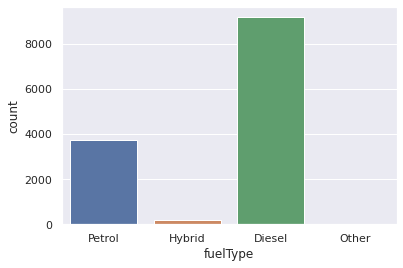

In [109]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(df['fuelType'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


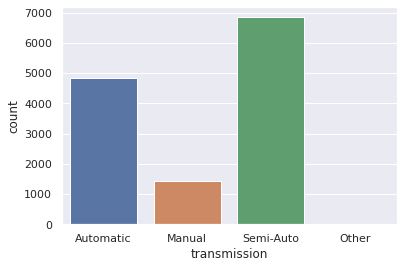

In [110]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(df['transmission'])

Большинство машин с автоматической и полуавтоматической КПП.

In [111]:
df['transmission'].value_counts()

Semi-Auto    6848
Automatic    4825
Manual       1444
Other           2
Name: transmission, dtype: int64

Постмотрим на распределение моделий автоболией.

 C Class      0.285616
 A Class      0.195213
 E Class      0.148868
 GLC Class    0.073176
 GLA Class    0.064563
 B Class      0.045049
 CL Class     0.038951
 GLE Class    0.035140
 SL CLASS     0.019819
 CLS Class    0.018065
 V Class      0.015779
 S Class      0.015016
 GL Class     0.009223
 SLK          0.007241
 CLA Class    0.006555
 X-CLASS      0.006250
 M Class      0.006022
 GLS Class    0.005641
 GLB Class    0.001448
 G Class      0.001143
 CLK          0.000534
 CLC Class    0.000229
 R Class      0.000152
200           0.000076
230           0.000076
180           0.000076
220           0.000076
Name: model, dtype: float64


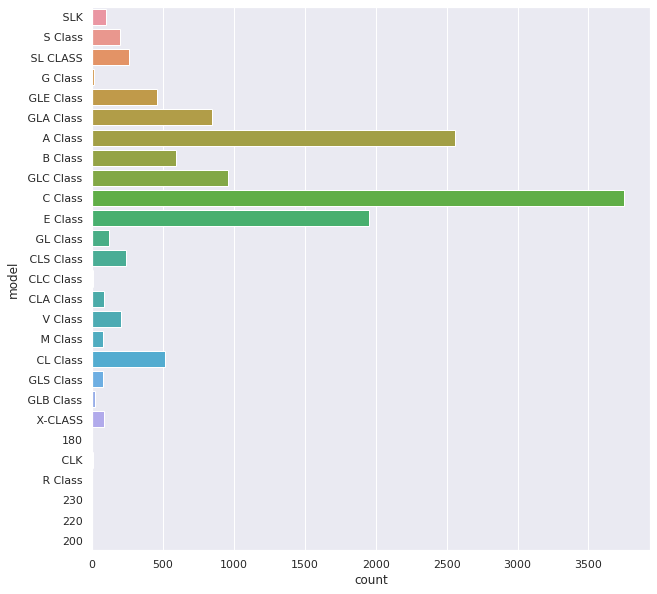

In [112]:
print(df['model'].value_counts() / df.shape[0])
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(y = df['model'])

Самые популярные - C,A,E Class.

Также визуализируем распределение года выпуска автомобилей.

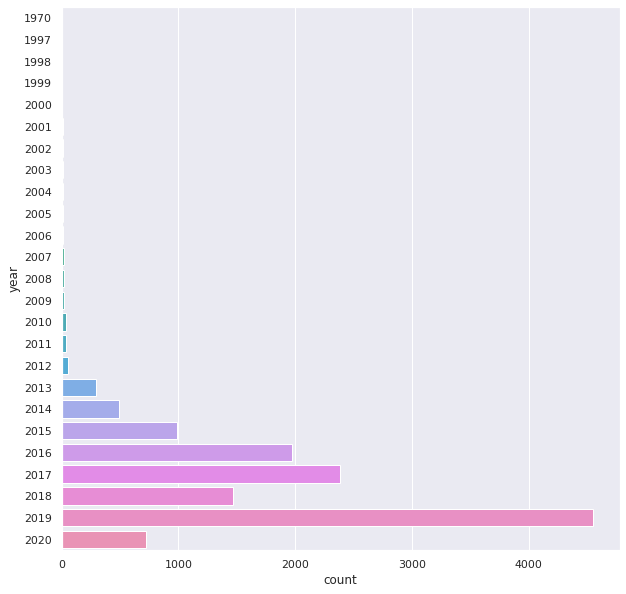

In [113]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(y = df['year'])

Посмотрим на зависимость цены автомобиля от года выпуска.

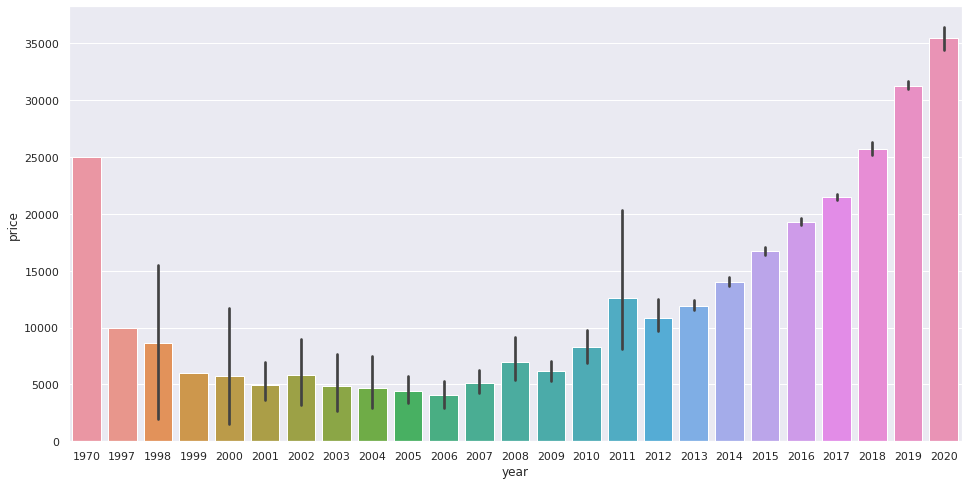

In [114]:

sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(x=df['year'], y=df['price'])

Видим, что в среднем, чем новее машина тем дороже. Однако, если идти по временному ряду назад, то выбросы становятся все больше. Это обусловленно тем, что за такой большой период сложно сохранить автомобиль и, чем лучше у него состояние, тем он дороже.

Зависимость цены от пробега при данной КПП

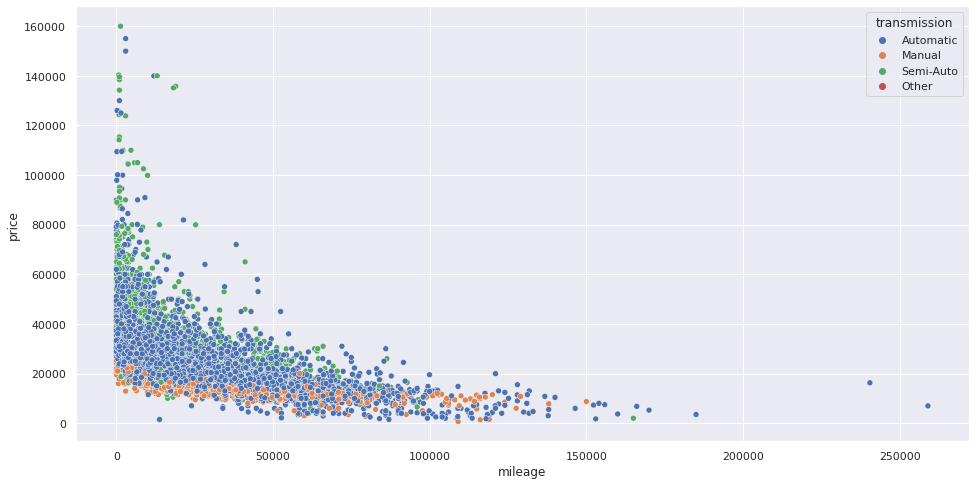

In [115]:
sns.scatterplot(x=df['mileage'], y=df['price'], hue=df['transmission'])

Чем меньше пробег, тем машина дороже. Также ручная КПП показатель более низкой цены, а полуавтоматическая - более высокой.

In [116]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов

In [117]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

Преобразуем строковые объекты в числовые.

In [118]:
df['fuelType'].unique()

array(['Petrol', 'Hybrid', 'Diesel', 'Other'], dtype=object)

In [119]:
fuel = {'Petrol':0, 'Hybrid':1, 'Diesel':2, 'Other':3}
df = df.replace({'fuelType' : fuel})

In [120]:
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto', 'Other'], dtype=object)

In [121]:
transmission = {'Automatic':0, 'Manual':1, 'Semi-Auto':2, 'Other':3}
df = df.replace({'transmission':transmission})

In [122]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,0,63000,0,325,32.1,1.8
1,S Class,2017,34948,0,27000,1,20,61.4,2.1
2,SL CLASS,2016,49948,0,6200,0,555,28.0,5.5
3,G Class,2016,61948,0,16000,0,325,30.4,4.0
4,G Class,2016,73948,0,4000,0,325,30.1,4.0


In [123]:
df_expanded = pd.get_dummies(df)

In [124]:
print(df_expanded.shape)
df_expanded.head()

(13119, 35)


,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_ A Class,model_ B Class,model_ C Class,model_ CL Class,model_ CLA Class,model_ CLC Class,model_ CLK,model_ CLS Class,model_ E Class,model_ G Class,model_ GL Class,model_ GLA Class,model_ GLB Class,model_ GLC Class,model_ GLE Class,model_ GLS Class,model_ M Class,model_ R Class,model_ S Class,model_ SL CLASS,model_ SLK,model_ V Class,model_ X-CLASS,model_180,model_200,model_220,model_230
0,2005,5200,0,63000,0,325,32.1,1.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2017,34948,0,27000,1,20,61.4,2.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2016,49948,0,6200,0,555,28.0,5.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2016,61948,0,16000,0,325,30.4,4.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016,73948,0,4000,0,325,30.1,4.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Разделим данные на обучающую и тестовую выборки.

In [125]:
X = df_expanded.drop(columns=['price'])
y = df_expanded['price']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Нормализуем данные.

In [127]:
pca = MinMaxScaler()
pca.fit(X_train)

X_train = pca.transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test = pca.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)


In [128]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10495, 34)
(2624, 34)
(10495,)
(2624,)


In [129]:
# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества 

Метрика R2 принимает значения от 0 до 1, чем ближе значение коэффициента к 1, тем сильнее модель соответствует данным. Эта метрика наиболее наглядна. Кроме того, используется в реализации линейной регрессии в sklearn.

In [130]:
def R2(y_actual, y_pred):
    ssr = np.sum((y_pred - y_actual)**2)
    sst = np.sum((y_actual - np.mean(y_actual))**2)
    r2_score = 1 - (ssr/sst)
    return r2_score

In [131]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

class myLinearRegression:
  def __init__(self, lr=0.05, max_iter = 10000):
    self.max_iter = max_iter
    self.lr = lr


  def fit(self, X, y):
    X = X.to_numpy()
    y = y.to_numpy()
    # Добавим единицу вначале
    X = np.hstack((np.full((X.shape[0], 1), 1),X))

    self.w = np.random.rand(X.shape[1])
    self.error = []
    m = X.shape[0]

    for i in range(self.max_iter):
      y_pred = np.dot(X, self.w)
      diff = y_pred - y
      grad = np.dot(X.T, diff)
      self.w -= self.lr * grad / m
      self.error.append(np.sum(diff ** 2) / (2 * m))
    return self

  def predict(self, X):
    X = X.to_numpy()
    X = np.hstack((np.full((X.shape[0], 1), 1),X))
    return np.dot(X, self.w)
  def score(self, X, y):
    y = y.to_numpy()
    y_pred = self.predict(X)
    return R2(y, y_pred)


In [132]:
myLR = myLinearRegression()
myLR.fit(X_train, y_train)

In [133]:
# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

In [134]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn
train_score = myLR.score(X_train, y_train)
test_score = myLR.score(X_test, y_test)


In [135]:
print("train score: {}\ntest score: {}".format(train_score, test_score))

train score: 0.7316843763785396
test score: 0.7029136612162172


In [136]:
# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках


Составим график ошибки модели во время обучения.

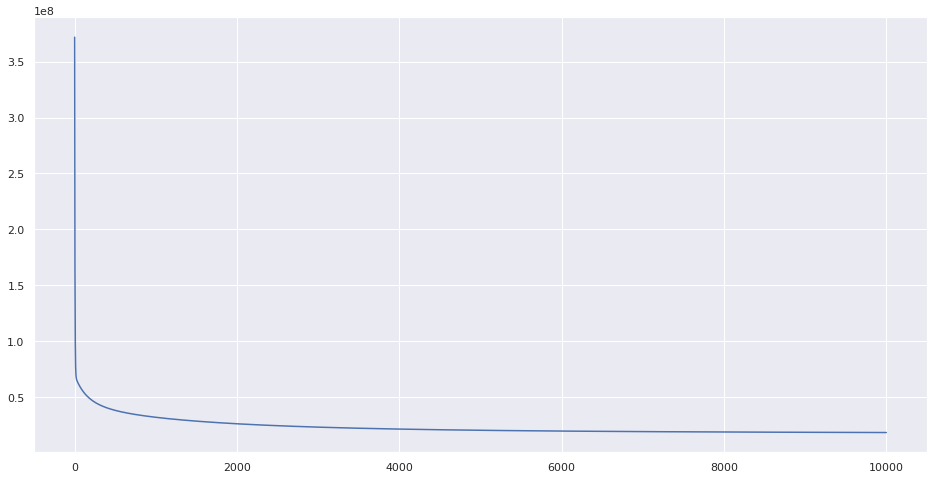

In [137]:
plt.plot(myLR.error)

In [138]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
LR = LinearRegression(n_jobs=10000)
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10000, normalize=False)

In [141]:
train_score = LR.score(X_train, y_train)
test_score = LR.score(X_test, y_test)


In [142]:
print("train score: {}\ntest score: {}".format(train_score, test_score))

train score: 0.7650950422585729
test score: 0.7347662174834768


In [143]:
# 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
# 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью